C:\Users\edwar\AppData\Local\Temp\ipykernel_2852\18607081.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


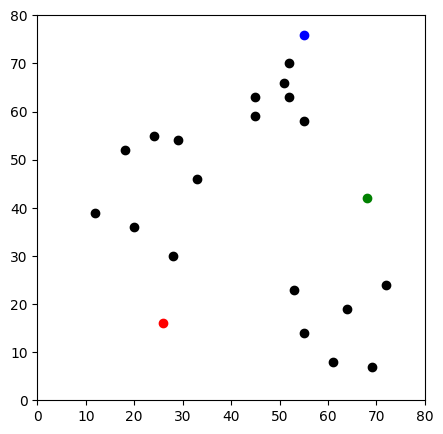

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.DataFrame({
'x':[12,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
'y':[39,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})
np.random.seed(200)
k=int(input("ENTER THE VALUE OF k :"))3
centroids={
    i+1:[np.random.randint(0,80),np.random.randint(0,80)] 
    for i in range(k)
}

fig=plt.figure(figsize=(5,5))
plt.scatter(data['x'],data['y'],color='k')
colmap={1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

    x   y  distance_from_1  distance_from_2  distance_from_3  closest color
0  12  39        26.925824        56.080300        56.727418        1     r
1  20  36        20.880613        48.373546        53.150729        1     r
2  28  30        14.142136        41.761226        53.338541        1     r
3  18  52        36.878178        50.990195        44.102154        1     r
4  29  54        38.118237        40.804412        34.058773        3     b


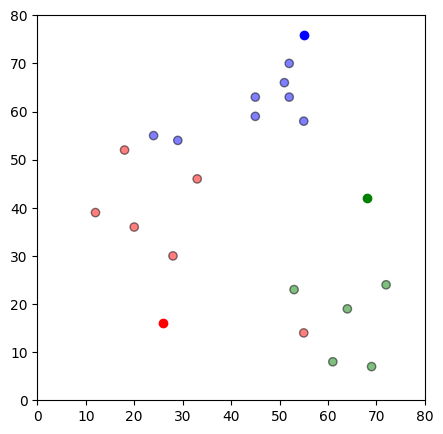

In [2]:
def assign (dat,centroids):
    for i in centroids.keys():
        data['distance_from_{}'.format(i)]=(
            np.sqrt((data['x']- centroids [i][0]) **2 + (data['y']- centroids[i][1]) **2)
        )
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
    data['closest']=data.loc[:, centroid_distance_cols].idxmin(axis=1)
    data['closest']=data['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    data['color']=data['closest'].map(lambda x: colmap[x])
    return data
data=assign(data,centroids)
print(data.head())
fig=plt.figure(figsize=(5, 5))
plt.scatter(data['x'], data['y'], color=data['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids [i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

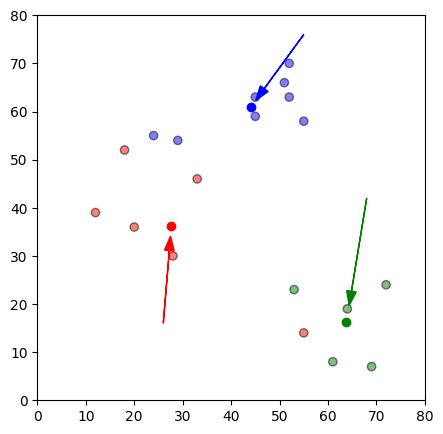

In [3]:
import copy
old_centroids=copy.deepcopy (centroids)
def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean (data[data['closest']==i]['x'])
        centroids[i][1]=np.mean (data[data['closest']==i]['y'])
    return k
centroids=update(centroids)
fig=plt.figure(figsize=(5,5))
ax=plt.axes()
plt.scatter(data['x'],data['y'],color=data['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x=old_centroids[i][0]
    old_y=old_centroids[i][1]
    dx=(centroids [i][0]- old_centroids[i][0]) * 0.75
    dy=(centroids [i] [1] -old_centroids[i][1]) * 0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=colmap[i])
plt.show()